# Обработка изображений
### Борунов Семён Сергеевич НММбд01-22

In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
import cv2

### Задача 1

Скачайте изображение шахмотной доски по ссылке. При помощи операций эрозии и расширения, рассмотренных на занятии, очистите изображение от шумов. Результат выведите на экран.


CV2 отказывается работать с jpg поэтому будем делать из них png

In [3]:
# mpimg.imsave('img/chess.png', mpimg.imread('img/chess.jpg'))

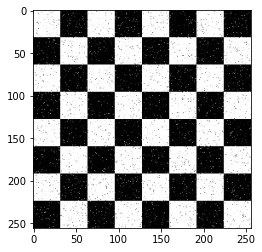

In [4]:
img = cv2.imread("img/chess.png")

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

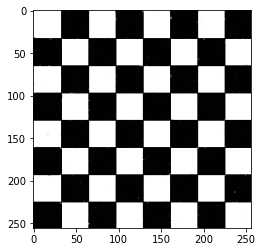

In [5]:
kernel_e = np.full((3, 3), 1, np.uint8)
kernel_d = np.full((2, 2), 1, np.uint8)

clear =  cv2.erode(cv2.dilate(img, kernel_d), kernel_e)

clear =  cv2.erode(cv2.dilate(clear, np.full((2, 2), 3, np.uint8)), np.full((2, 2), 3, np.uint8))


plt.imshow(clear)
plt.show()

### Задача 2

На изображении шахматной доски, полученном в результате выполнения предыдущего задания, выполните операцию обнаружения линий. Отрисуйте обнаруженные линии на изображении красным цветом.

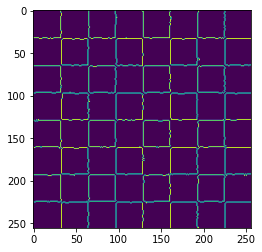

In [6]:
dst_img = cv2.Canny(clear, 100, 400, None, 3)

plt.imshow(dst_img)
plt.show()

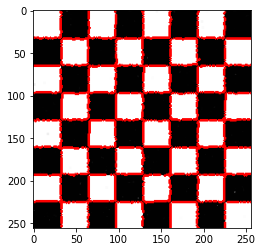

In [7]:
linesP = cv2.HoughLinesP(image = dst_img,
                         rho = 3,
                         theta = np.pi / 180,
                         threshold = 5,
                         minLineLength = 0,
                         maxLineGap = 1)
for i in range(0, len(linesP)):
    lin = linesP[i][0]
    cv2.line(img = clear,
            pt1 = (lin[0], lin[1]),
            pt2 = (lin[2], lin[3]),
            color=(255,0,0),
            thickness = 2)
    

plt.imshow(clear)
plt.show()

### Задача 3

При помощи библиотеки cv2 на занятии мы находили окружности на изображении с автомобильными дисками. Доработайте алгоритм таким образом, чтобы вместо окружностей на изображении отрисовывались прямоугольники.

In [8]:
# mpimg.imsave('img/depositphotos.png', mpimg.imread('img/depositphotos.jpg'))

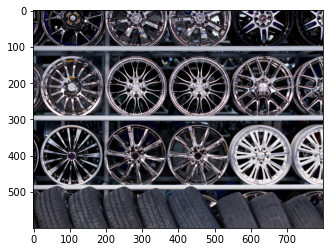

In [16]:
# чтение изображения из файла
img = cv2.imread('img/depositphotos.png', cv2.IMREAD_COLOR)


img = cv2.resize(img,(800, 600))

plt.imshow(img)
plt.show()

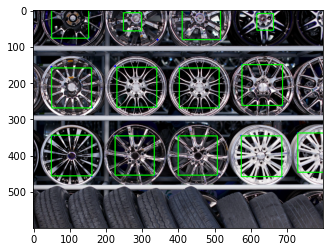

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

detected_circles = cv2.HoughCircles(gray_blurred,
                                    cv2.HOUGH_GRADIENT,
                                    1,
                                    100,
                                    param1 = 50,
                                    param2 = 60,
                                    minRadius = 30,
                                    maxRadius = 80)

if detected_circles is not None:

    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        t = round(r*np.sqrt(2)/2)
        x1 = (a-t, b-t)
        x2 = (a+t, b+t)

        cv2.rectangle(img, x1, x2, (0, 255, 0), 2)

#         cv2.circle(img, x1, 1, (0, 0, 255), 3)
#         cv2.circle(img, x2, 1, (0, 0, 255), 3)

        

    # вывод на экран
    plt.imshow(img)
    plt.show()

### Задача 4

Используя пороговую функцию cv2.threshold() на изображении deer.jpeg, преобразуйте изображение в бинарную маску, в которой силуэт животного будет белым на черном фоне. При необходимости можно воспользоваться функциями эрозии и расширения.

In [20]:
# mpimg.imsave('img/deer.png', mpimg.imread('img/deer.jpeg'))

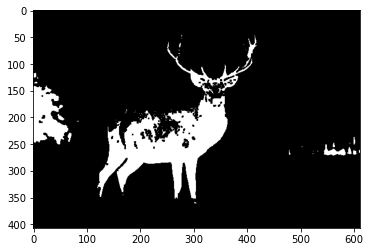

In [61]:
img = cv2.imread('img/deer.png', cv2.IMREAD_GRAYSCALE)

ret,thresh = cv2.threshold(img, 97,240,cv2.THRESH_BINARY_INV)

clear =  cv2.erode(cv2.dilate(thresh, np.full((3, 3), 3, np.uint8)), np.full((3, 3), 3, np.uint8))

plt.imshow(clear, cmap='gray')
plt.show()

### Задача 5

Скачайте изображение мыльных пузырей по ссылке . Выполните распознавание окружностей как можно большего количества мыльных пузырей при помощи библиотеки cv2 и отрисуйте их на изображении.

In [62]:
# mpimg.imsave('img/Bubbles.png', mpimg.imread('img/Bubbles.jpg'))

17


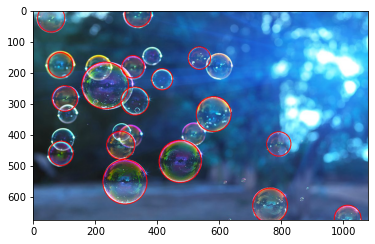

In [81]:
img = cv2.imread('img/Bubbles.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_blurred = cv2.blur(gray, (3, 3))

detected_circles = cv2.HoughCircles(gray_blurred,
                                    cv2.HOUGH_GRADIENT,
                                    1,
                                    100,
                                    param1 = 30,
                                    param2 = 40,
                                    minRadius = 10,
                                    maxRadius = 80)

print(len(detected_circles[0, :]))
if detected_circles is not None:

    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

        cv2.circle(img, (a, b), r, (255, 0, 0), 2)

    plt.imshow(img)
    plt.show()